In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# creating distributions
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

In [3]:
# creating data
data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

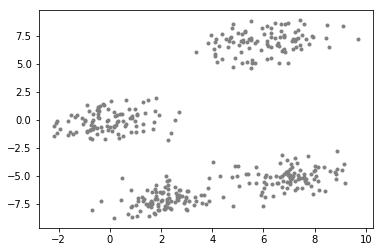

In [4]:
# visualize data
plt.scatter(data[:, 0], data[:, 1], marker = '.', color = 'gray')
plt.show()

In [5]:
# euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

In [6]:
# define clusters
k = 4
clusters = {}
colors = ['blue', 'orange', 'green', 'red']
max_itr = 5
for i in range(k):
    cluster_vals = {
        'centroid': None,
        'points': [],
        'color': colors[i],
        'hist': []
    }
    clusters[i] = cluster_vals

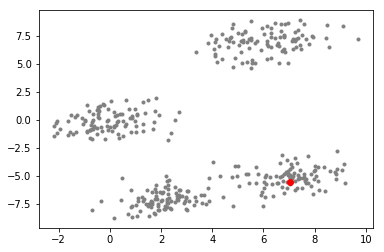

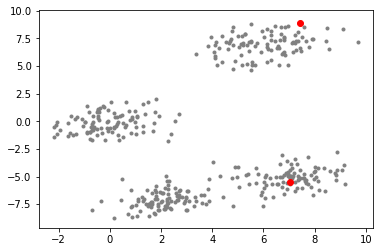

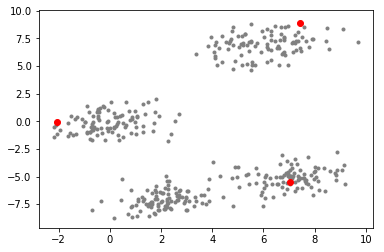

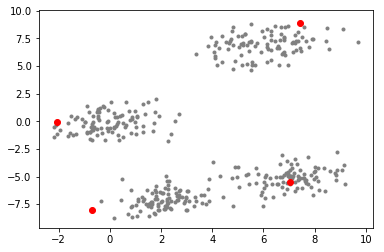

In [9]:
# plot the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.', color = 'gray')
    plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red')
    plt.show()

# initialisation algorithm
centroids = []
centroids.append(data[np.random.randint(data.shape[0]), :])
plot(data, np.array(centroids))
for c_id in range(k - 1):
    dist = []
    for i in range(data.shape[0]):
        point = data[i, :]
        d = sys.maxsize
        for j in range(len(centroids)):
            temp_dist = distance(point, centroids[j])
            d = min(d, temp_dist)
        dist.append(d)
    dist = np.array(dist)
    next_centroid = data[np.argmax(dist), :]
    centroids.append(next_centroid)
    dist = []
    plot(data, np.array(centroids))

for i in range(k):
    clusters[i]['centroid'] = centroids[i]

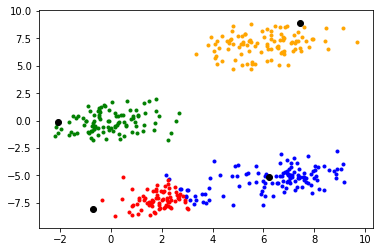

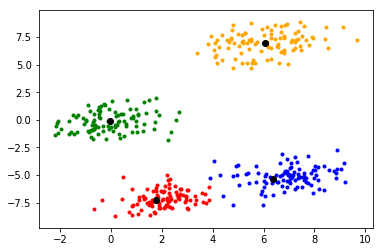

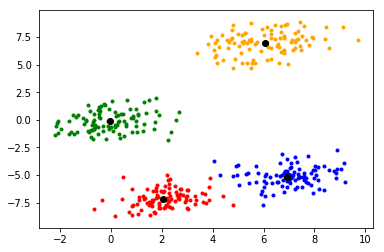

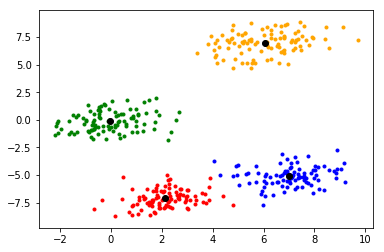

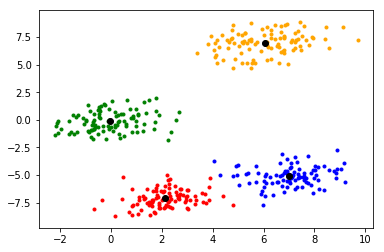

In [8]:
for itr in range(max_itr):
    plt.figure()
    for i in range(data.shape[0]):
        dist = []
        for c_id in range(k):
            d = distance(data[i, :], clusters[c_id]['centroid'])
            dist.append(d)
        dist = np.array(dist)
        cluster_id = dist.argmin()
        clusters[cluster_id]['points'].append(data[i, :])
    for c_id in range(k):
        cluster = clusters[c_id]
        for p in cluster['points']:
            plt.scatter(p[0], p[1], color = cluster['color'], marker = '.')
        plt.scatter(cluster['centroid'][0], cluster['centroid'][1], color = 'black')
    plt.show()
    for c_id in range(k):
        cluster = clusters[c_id]
        cluster['hist'].append(cluster['centroid'])
        if len(cluster['points']) > 0:
            cluster['centroid'] = np.mean(np.array(cluster['points']), axis = 0)
        if itr < (max_itr - 1):
            cluster['points'] = []